2025-06-29 19:47:11.779872: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751226432.012933      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751226432.076701      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Inspecting first 2 rows of first GeoJSON file:

Row 0:
  Band B2: shape=(5, 5), first few values=[0.1199 0.1232 0.1181 0.1181 0.1214]
  Band B11: shape=(5, 5), first few values=[0.1948 0.1948 0.1948 0.1948 0.1948]
  Band NDVI: shape=(5, 5), first few values=[0.39792746 0.42402312 0.37617397 0.37617397 0.37750387]
  Band B2_1: shape=(5, 5), first few values=[0.1116  0.1156  0.11175 0.11175 0.1126 ]
  Band NDVI_7: shape=(5, 5), first few values=[0.36709487 0.40554884 0.3867531  0.3867531  0.41388893]

Row 1:
  Band B2: shape=(5, 5), first few values=[0.16435    0.16420001 0.16425    0.16425    0.16104999]
  Band B11: shape=(5, 5), first few values=[0.39015 0.3837  0.3837  0.3837  0.38475]
  Band NDVI: shape=(5, 5), first few values=[0.2502519  0.23345953 0.23224421 0.23224421 0.2611491 ]
  Band B2_1: shape=(5, 5), first few values=[0.1584  0.16255 0.1603  0.1603  0.1575 ]
  Band NDVI_7: shape=(5, 5), first few values=[0.3425891  0.3387759  0.33388162 0.33388162 0.35415313]

Loaded 26268 

I0000 00:00:1751226817.643621      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 5, 5, 120)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 5, 5, 32)       │         34,592 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 5, 5, 32)       │            128 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 5, 5, 64)       │         18,496 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 5, 5, 64)       │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 2, 2, 64)       │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 2, 2, 128)      │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 2, 2, 128)      │            512 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 512)            │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │         65,664 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 128)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ l1 (Dense)                │ (None, 2)              │            258 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ l2 (Dense)                │ (None, 9)              │          1,161 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ l3 (Dense)                │ (None, 19)             │          2,451 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 197,374 (770.99 KB)

 Trainable params: 196,926 (769.24 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/50


I0000 00:00:1751226826.008031      59 service.cc:148] XLA service 0x5d325a40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751226826.008888      59 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1751226826.539052      59 cuda_dnn.cc:529] Loaded cuDNN version 90300


 40/288 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - l1_accuracy: 0.6926 - l1_loss: 0.7181 - l2_accuracy: 0.2102 - l2_loss: 2.4527 - l3_accuracy: 0.0801 - l3_loss: 3.5152 - loss: 6.6860

I0000 00:00:1751226830.095825      59 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


288/288 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - l1_accuracy: 0.7947 - l1_loss: 0.4987 - l2_accuracy: 0.3351 - l2_loss: 1.9352 - l3_accuracy: 0.2074 - l3_loss: 2.8081 - loss: 5.2420 - val_l1_accuracy: 0.8406 - val_l1_loss: 0.4368 - val_l2_accuracy: 0.3162 - val_l2_loss: 1.8101 - val_l3_accuracy: 0.3258 - val_l3_loss: 2.4577 - val_loss: 4.7053
Epoch 2/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - l1_accuracy: 0.8642 - l1_loss: 0.3359 - l2_accuracy: 0.4949 - l2_loss: 1.4286 - l3_accuracy: 0.3868 - l3_loss: 2.0695 - loss: 3.8340 - val_l1_accuracy: 0.8754 - val_l1_loss: 0.3169 - val_l2_accuracy: 0.5387 - val_l2_loss: 1.3753 - val_l3_accuracy: 0.4078 - val_l3_loss: 2.0065 - val_loss: 3.6978
Epoch 3/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - l1_accuracy: 0.8763 - l1_loss: 0.3097 - l2_accuracy: 0.5695 - l2_loss: 1.2665 - l3_accuracy: 0.4366 - l3_loss: 1.9050 - loss: 3.4813 - val_l1_accuracy: 0.8810 - val_l1_loss: 0.2779 - val_l2_accuracy: 0.5532 - val_l2_loss: 1.2021 - val_l3_accuracy: 0.4405 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classif

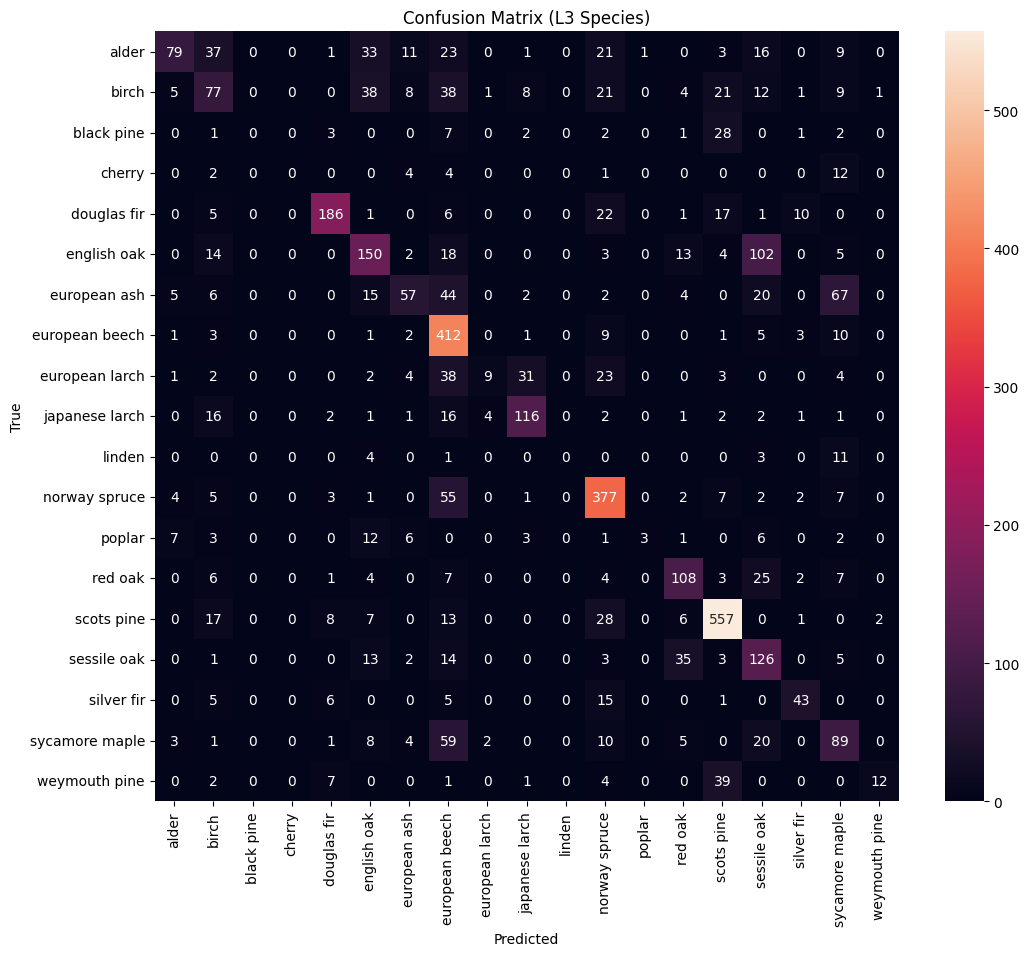

['label_encoder_l3.pkl']

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import geopandas as gpd
import ast
import os
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# -----------------------------
# Load & Process Data
# -----------------------------
data_dir = "/kaggle/input/treesatai1"
bands = ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B11', 'B12', 'NDVI', 'EVI', 'EVI2', 'SAVI', 'NDWI']
months = ['', '_1', '_2', '_3', '_4', '_5', '_6', '_7']
band_columns = [band + month for month in months for band in bands]

all_features, l1_labels, l2_labels, l3_labels = [], [], [], []
invalid_samples = []
invalid_bands = Counter()
species_counts = Counter()

# Inspect first file
first_file = os.path.join(data_dir, os.listdir(data_dir)[0]) if os.listdir(data_dir) else None
if first_file and first_file.endswith(".geojson"):
    gdf = gpd.read_file(first_file)
    print("Inspecting first 2 rows of first GeoJSON file:")
    for idx in range(min(2, len(gdf))):
        print(f"\nRow {idx}:")
        for band in ['B2', 'B11', 'NDVI', 'B2_1', 'NDVI_7']:
            data = gdf[band].iloc[idx]
            try:
                parsed_data = ast.literal_eval(data) if isinstance(data, str) else data
                array = np.array(parsed_data, dtype=np.float32)
                print(f"  Band {band}: shape={array.shape}, first few values={array.flatten()[:5]}")
            except (ValueError, SyntaxError, TypeError) as e:
                print(f"  Band {band}: Error parsing/converting: {e}")

# Load all GeoJSON files
for file in os.listdir(data_dir):
    if file.endswith(".geojson"):
        gdf = gpd.read_file(os.path.join(data_dir, file))
        for idx, row in gdf.iterrows():
            try:
                patch = []
                for col in band_columns:
                    data = row[col]
                    if data is None or (isinstance(data, str) and data.lower() == 'none'):
                        invalid_bands[col] += 1
                        raise ValueError(f"None value in band {col}")
                    parsed_data = ast.literal_eval(data) if isinstance(data, str) else data
                    array = np.array(parsed_data, dtype=np.float32).reshape(5, 5)
                    patch.append(array)
                patch = np.stack(patch, axis=-1)
                if patch.shape != (5, 5, 120):
                    raise ValueError(f"Unexpected patch shape: {patch.shape}")
                all_features.append(patch)
                l1_labels.append(row['l1_leaf_types'])
                l2_labels.append(row['l2_genus'])
                l3_labels.append(row['l3_species'])
                species_counts[row['l3_species']] += 1
            except (ValueError, SyntaxError, TypeError) as e:
                invalid_samples.append((file, idx, str(e)))
                continue

# Logging
print(f"\nLoaded {len(all_features)} valid samples.")
if invalid_samples:
    print(f"\nSkipped {len(invalid_samples)} invalid samples:")
    for file, idx, error in invalid_samples[:5]:
        print(f"  File: {file}, Row: {idx}, Error: {error}")
if invalid_bands:
    print("\nBands with None values:")
    for band, count in invalid_bands.most_common():
        print(f"  {band}: {count} times")
print("\nValid samples per species:")
for species, count in species_counts.most_common():
    print(f"  {species}: {count}")

# Convert to NumPy arrays
if not all_features:
    print("\nError: No valid samples loaded. Using Random Forest with dummy data.")
    from sklearn.ensemble import RandomForestClassifier
    X_dummy = np.random.rand(100, 5*5*120)
    y_dummy = np.random.randint(0, 5, 100)
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_dummy, y_dummy)
    print("Random Forest dummy accuracy:", rf.score(X_dummy, y_dummy))
    print("Please re-export data with updated GEE code.")
    exit()

X = np.array(all_features, dtype=np.float32)

# -----------------------------
# Encode Labels
# -----------------------------
le_l1 = LabelEncoder()
le_l2 = LabelEncoder()
le_l3 = LabelEncoder()

y_l1 = le_l1.fit_transform(l1_labels)
y_l2 = le_l2.fit_transform(l2_labels)
y_l3 = le_l3.fit_transform(l3_labels)

y_l1_cat = tf.keras.utils.to_categorical(y_l1)
y_l2_cat = tf.keras.utils.to_categorical(y_l2)
y_l3_cat = tf.keras.utils.to_categorical(y_l3)

# Compute class weights for reference (not used in training)
class_weights_l1 = compute_class_weight('balanced', classes=np.unique(y_l1), y=y_l1)
class_weights_l2 = compute_class_weight('balanced', classes=np.unique(y_l2), y=y_l2)
class_weights_l3 = compute_class_weight('balanced', classes=np.unique(y_l3), y=y_l3)

# -----------------------------
# Train-Test-Validation Split
# -----------------------------
X_train, X_test, y1_train, y1_test, y2_train, y2_test, y3_train, y3_test = train_test_split(
    X, y_l1_cat, y_l2_cat, y_l3_cat, test_size=0.15, random_state=42, stratify=y_l3_cat
)
X_train, X_val, y1_train, y1_val, y2_train, y2_val, y3_train, y3_val = train_test_split(
    X_train, y1_train, y2_train, y3_train, test_size=0.1765, random_state=42, stratify=y3_train
)

# -----------------------------
# Build Multi-output CNN (using original architecture)
# -----------------------------
def build_cnn(input_shape=(5, 5, 120), num_classes_l1=len(le_l1.classes_), num_classes_l2=len(le_l2.classes_), num_classes_l3=len(le_l3.classes_)):
    input_layer = tf.keras.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    # Branches for hierarchical outputs
    output_l1 = layers.Dense(num_classes_l1, activation='softmax', name='l1')(x)
    output_l2 = layers.Dense(num_classes_l2, activation='softmax', name='l2')(x)
    output_l3 = layers.Dense(num_classes_l3, activation='softmax', name='l3')(x)

    return models.Model(inputs=input_layer, outputs=[output_l1, output_l2, output_l3])

model = build_cnn()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss={'l1': 'categorical_crossentropy', 'l2': 'categorical_crossentropy', 'l3': 'categorical_crossentropy'},
              metrics={'l1': 'accuracy', 'l2': 'accuracy', 'l3': 'accuracy'})

model.summary()

# -----------------------------
# Data Augmentation
# -----------------------------
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

# -----------------------------
# Train the Model
# -----------------------------
history = model.fit(
    data_augmentation(X_train), [y1_train, y2_train, y3_train],
    validation_data=(X_val, [y1_val, y2_val, y3_val]),
    epochs=50,
    batch_size=64,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)
    ]
)

# -----------------------------
# Evaluate & Report
# -----------------------------
test_preds = model.predict(X_test)
pred_l1 = np.argmax(test_preds[0], axis=1)
pred_l2 = np.argmax(test_preds[1], axis=1)
pred_l3 = np.argmax(test_preds[2], axis=1)

true_l1 = np.argmax(y1_test, axis=1)
true_l2 = np.argmax(y2_test, axis=1)
true_l3 = np.argmax(y3_test, axis=1)

print("\nL1 Classification Report (Leaf Types):")
print(classification_report(true_l1, pred_l1, target_names=le_l1.classes_))
print(f"Weighted Precision: {precision_score(true_l1, pred_l1, average='weighted'):.4f}")
print(f"Weighted Recall: {recall_score(true_l1, pred_l1, average='weighted'):.4f}")
print(f"Weighted F1-Score: {f1_score(true_l1, pred_l1, average='weighted'):.4f}")

print("\nL2 Classification Report (Genus):")
print(classification_report(true_l2, pred_l2, target_names=le_l2.classes_))
print(f"Weighted Precision: {precision_score(true_l2, pred_l2, average='weighted'):.4f}")
print(f"Weighted Recall: {recall_score(true_l2, pred_l2, average='weighted'):.4f}")
print(f"Weighted F1-Score: {f1_score(true_l2, pred_l2, average='weighted'):.4f}")

print("\nL3 Classification Report (Species):")
print(classification_report(true_l3, pred_l3, target_names=le_l3.classes_))
print(f"Weighted Precision: {precision_score(true_l3, pred_l3, average='weighted'):.4f}")
print(f"Weighted Recall: {recall_score(true_l3, pred_l3, average='weighted'):.4f}")
print(f"Weighted F1-Score: {f1_score(true_l3, pred_l3, average='weighted'):.4f}")

# -----------------------------
# Confusion Matrix for L3 (Species)
# -----------------------------
plt.figure(figsize=(12, 10))
cm = confusion_matrix(true_l3, pred_l3)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le_l3.classes_, yticklabels=le_l3.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (L3 Species)')
plt.show()

# -----------------------------
# Save Label Encoders
# -----------------------------
joblib.dump(le_l1, 'label_encoder_l1.pkl')
joblib.dump(le_l2, 'label_encoder_l2.pkl')
joblib.dump(le_l3, 'label_encoder_l3.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classif


L1 Classification Report (Leaf Types):
              precision    recall  f1-score   support

   broadleaf       0.88      0.95      0.91      2117
  needleleaf       0.93      0.85      0.89      1824

    accuracy                           0.90      3941
   macro avg       0.90      0.90      0.90      3941
weighted avg       0.90      0.90      0.90      3941

Weighted Precision: 0.9029
Weighted Recall: 0.9005
Weighted F1-Score: 0.9000

L2 Classification Report (Genus):
                       precision    recall  f1-score   support

                beech       0.59      0.89      0.71       448
          douglas fir       0.87      0.74      0.80       249
                  fir       0.75      0.56      0.64        75
                larch       0.86      0.60      0.71       282
 long-lived deciduous       0.69      0.58      0.63       466
                  oak       0.68      0.88      0.77       680
                 pine       0.89      0.86      0.88       752
short-lived deci

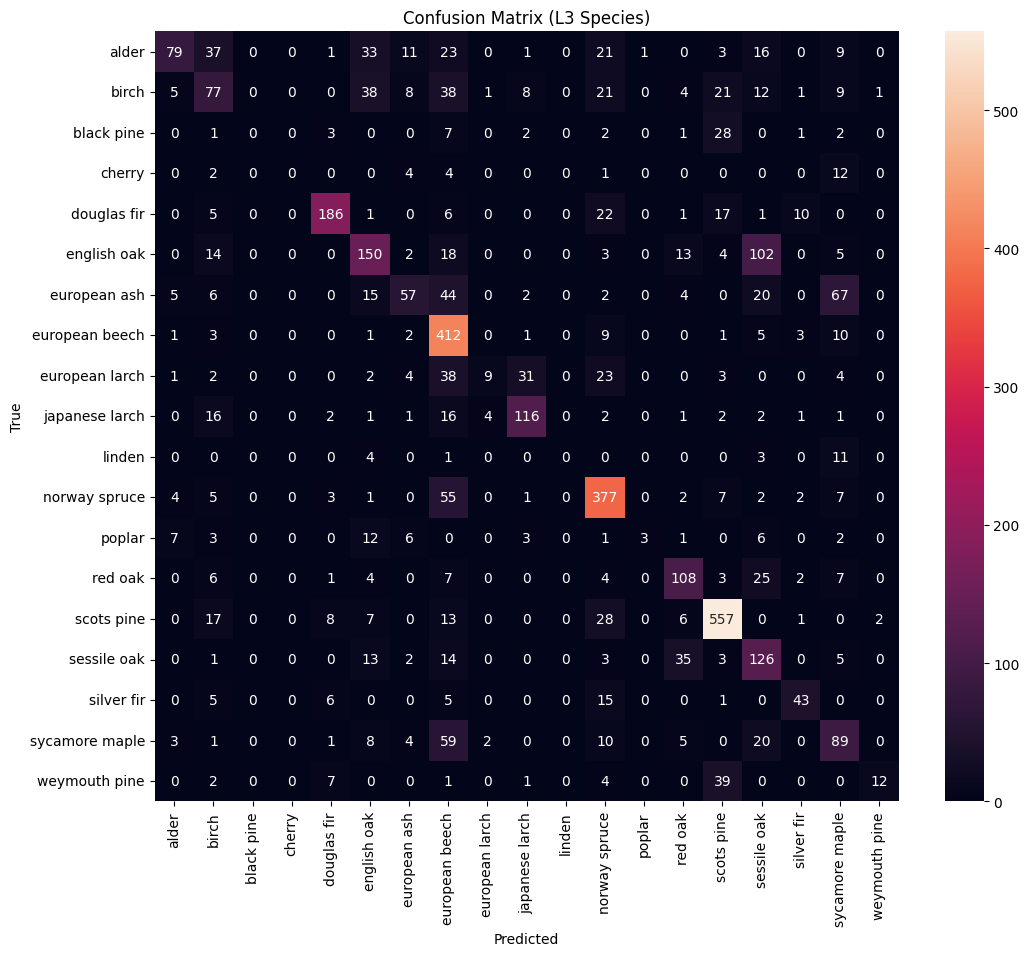

In [2]:
import json
# Compute confusion matrix for l3_species
cm = confusion_matrix(true_l3, pred_l3)

# Collect metrics for JSON
results = {
    "l1_leaf_types": {
        "classification_report": classification_report(true_l1, pred_l1, target_names=le_l1.classes_, output_dict=True),
        "weighted_precision": float(precision_score(true_l1, pred_l1, average='weighted')),
        "weighted_recall": float(recall_score(true_l1, pred_l1, average='weighted')),
        "weighted_f1_score": float(f1_score(true_l1, pred_l1, average='weighted'))
    },
    "l2_genus": {
        "classification_report": classification_report(true_l2, pred_l2, target_names=le_l2.classes_, output_dict=True),
        "weighted_precision": float(precision_score(true_l2, pred_l2, average='weighted')),
        "weighted_recall": float(recall_score(true_l2, pred_l2, average='weighted')),
        "weighted_f1_score": float(f1_score(true_l2, pred_l2, average='weighted'))
    },
    "l3_species": {
        "classification_report": classification_report(true_l3, pred_l3, target_names=le_l3.classes_, output_dict=True),
        "weighted_precision": float(precision_score(true_l3, pred_l3, average='weighted')),
        "weighted_recall": float(recall_score(true_l3, pred_l3, average='weighted')),
        "weighted_f1_score": float(f1_score(true_l3, pred_l3, average='weighted')),
        "confusion_matrix": {
            "matrix": cm.tolist(),
            "class_labels": le_l3.classes_.tolist()
        }
    }
}

# Save results to JSON
with open('evaluation_results.json', 'w') as f:
    json.dump(results, f, indent=4)

# Print metrics
print("\nL1 Classification Report (Leaf Types):")
print(classification_report(true_l1, pred_l1, target_names=le_l1.classes_))
print(f"Weighted Precision: {results['l1_leaf_types']['weighted_precision']:.4f}")
print(f"Weighted Recall: {results['l1_leaf_types']['weighted_recall']:.4f}")
print(f"Weighted F1-Score: {results['l1_leaf_types']['weighted_f1_score']:.4f}")

print("\nL2 Classification Report (Genus):")
print(classification_report(true_l2, pred_l2, target_names=le_l2.classes_))
print(f"Weighted Precision: {results['l2_genus']['weighted_precision']:.4f}")
print(f"Weighted Recall: {results['l2_genus']['weighted_recall']:.4f}")
print(f"Weighted F1-Score: {results['l2_genus']['weighted_f1_score']:.4f}")

print("\nL3 Classification Report (Species):")
print(classification_report(true_l3, pred_l3, target_names=le_l3.classes_))
print(f"Weighted Precision: {results['l3_species']['weighted_precision']:.4f}")
print(f"Weighted Recall: {results['l3_species']['weighted_recall']:.4f}")
print(f"Weighted F1-Score: {results['l3_species']['weighted_f1_score']:.4f}")

# -----------------------------
# Confusion Matrix for L3 (Species)
# -----------------------------
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le_l3.classes_, yticklabels=le_l3.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (L3 Species)')
plt.show()
